# **`Kaggle`** => Lending Club loan

{*Lending Club loan data 2007 through current Lending Club accepted and rejected loan data.* }
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:
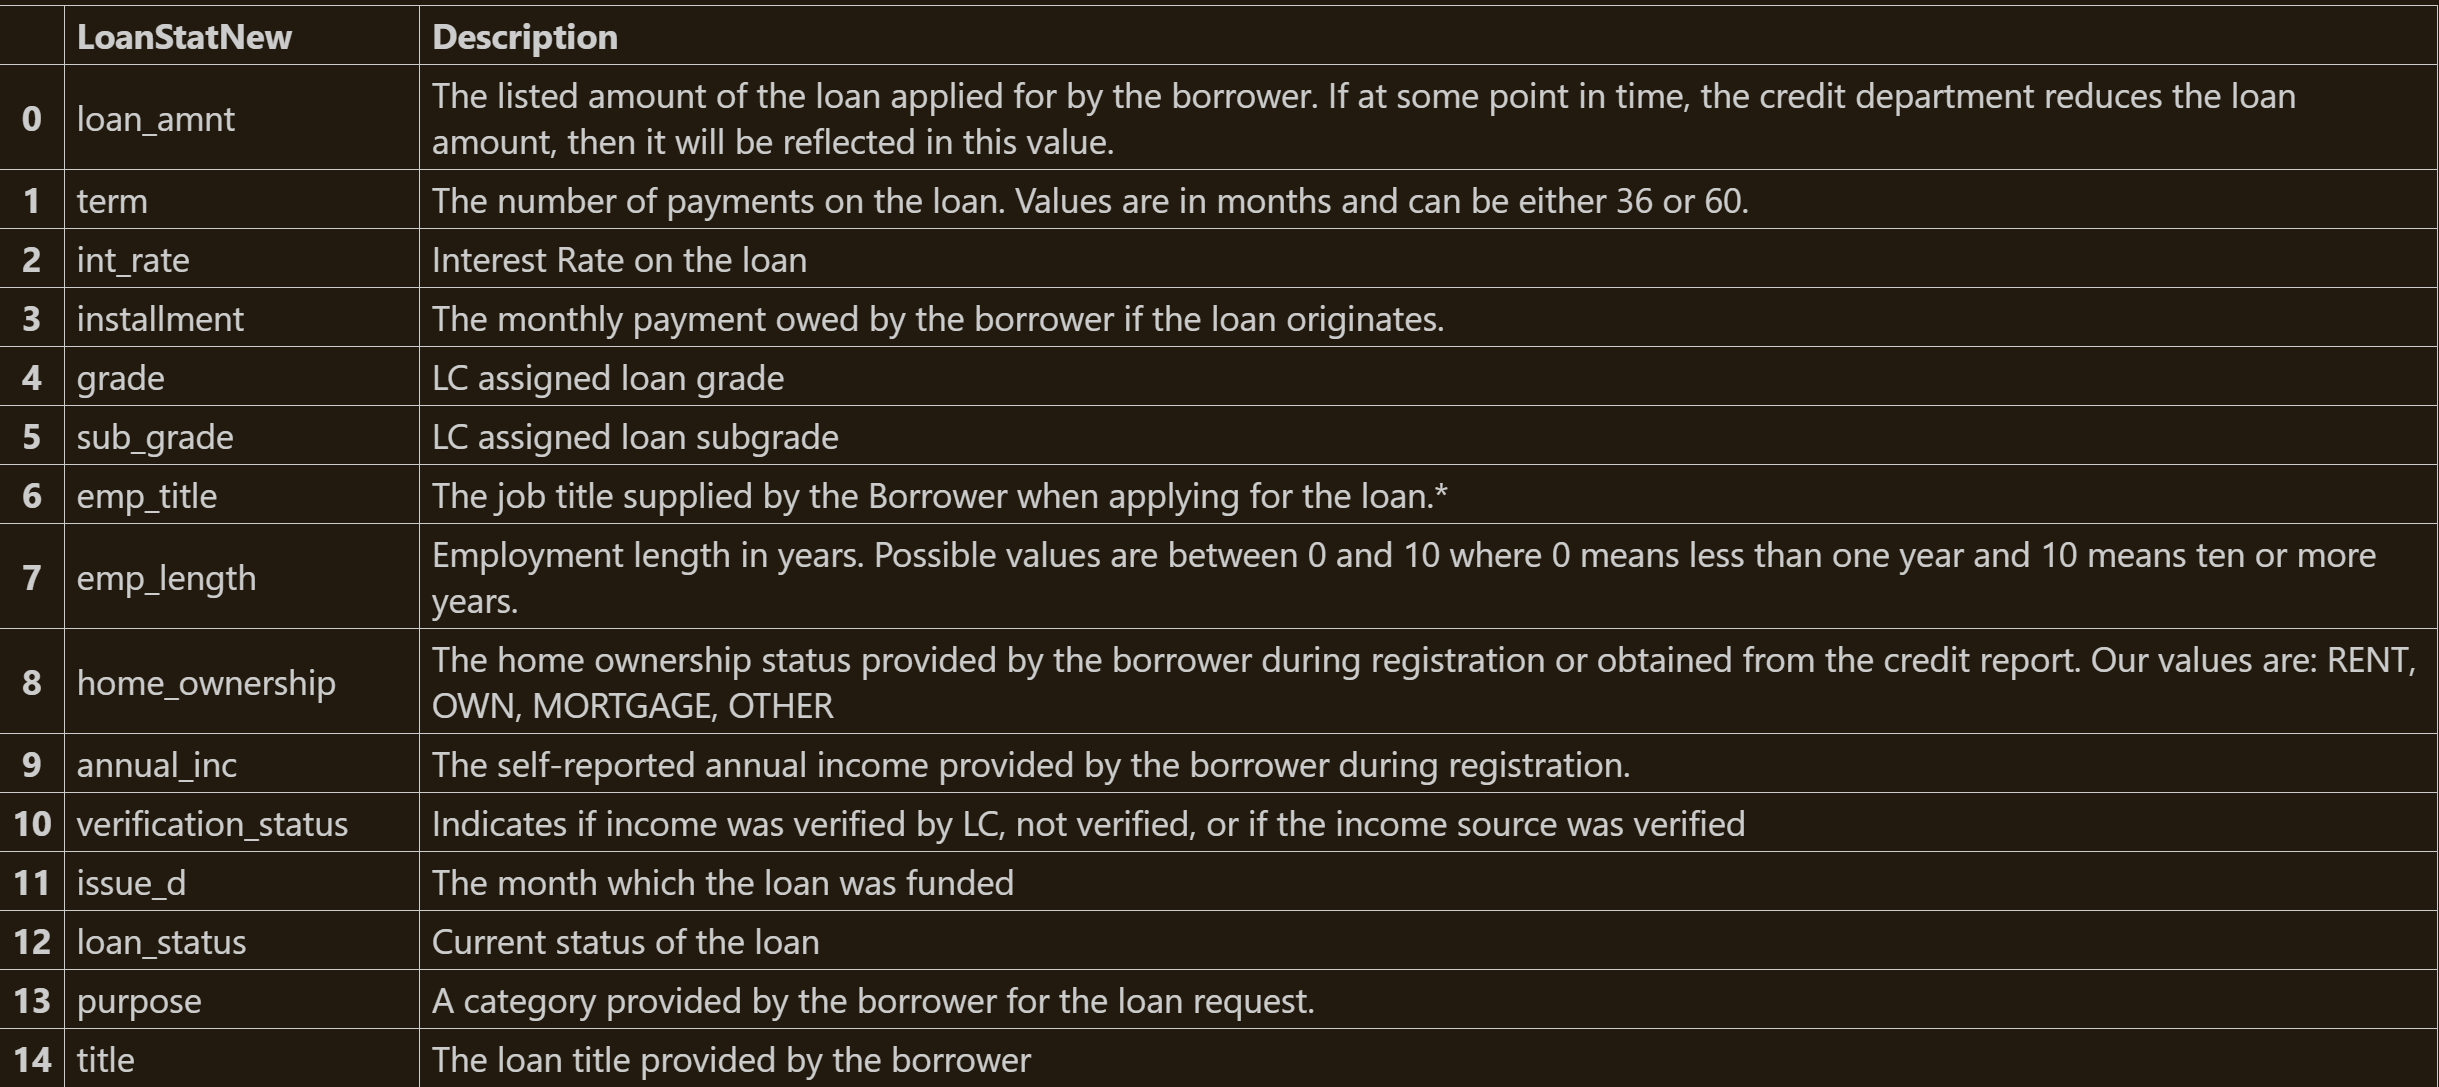

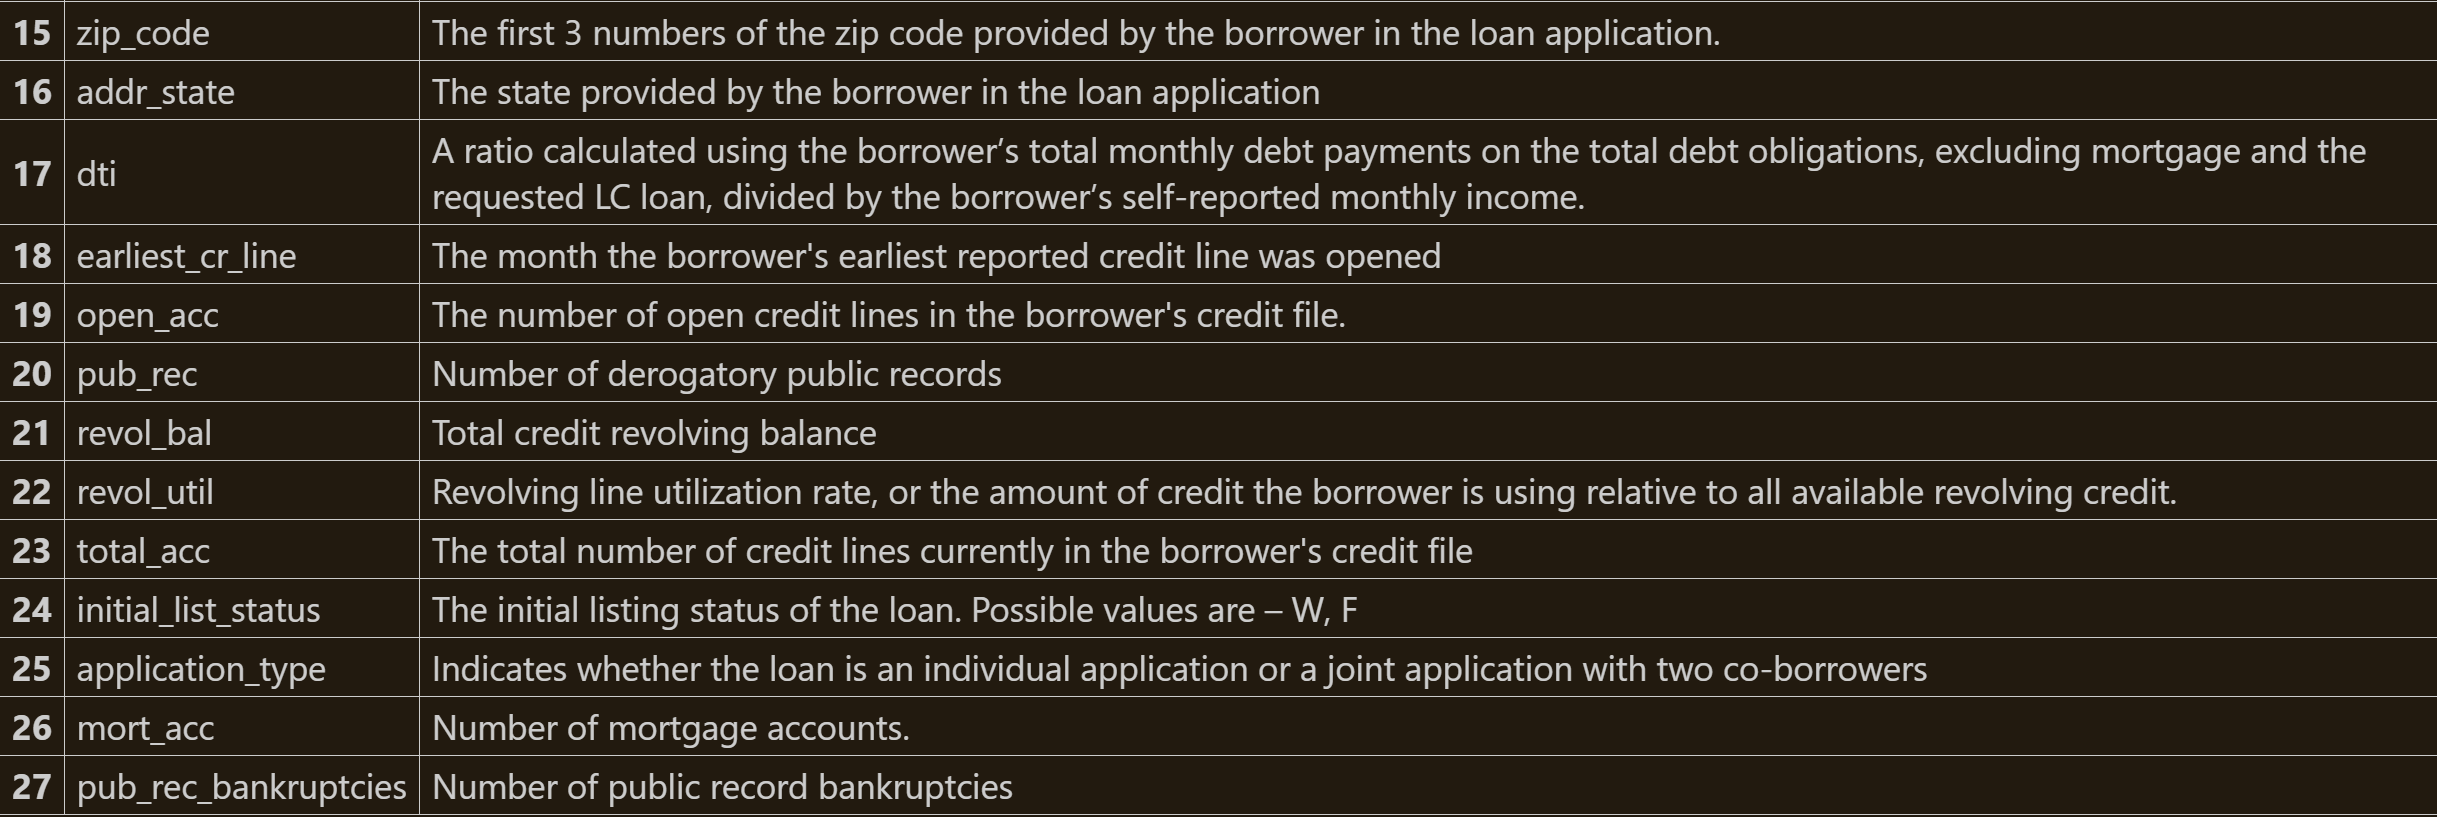

`Our Goal`:

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we `build a model that can predict wether or nor a borrower will pay back their loan?` This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The <<"loan_status">> column contains our label.

# **The Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Section_1: Exploratory Data Analysis(EDA)**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lending/lending_club_loan_two.csv


In [3]:
df=pd.read_csv('/kaggle/input/lending/lending_club_loan_two.csv')
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


`There are unshown columns ...  about 7 columns not animated because they are too many to be shown`

In [4]:
# To have a whole look at the Data sturcture; entries(rows)counts, columns counts and names, non_null count, datatype:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

There are some Data missing in some columns

In [5]:
# To know exactly the null data count in every column:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**`TASK_1`: Since we will be attempting to predict loan_status, create a countplot as shown below.

it's always a good idea,
especially of `classification` problems,
to do a `count plot` to explore
the actual balancing of your `labels`

In [6]:
df.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [7]:
df.loan_status.value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

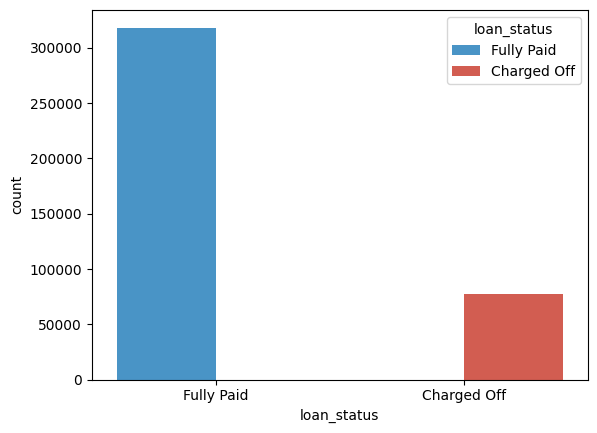

In [8]:
sns.countplot(x='loan_status',data=df, palette=['#3498db', '#e74c3c'],hue='loan_status')
plt.show()

- This is an `unbalanced`
or `imbalanced problem`.
Notice that we have a lot more entries,
of people that fully pay off their loans
than we have people that did not pay back.
And this is really common for things
like classification problems,
that have to do with fraud or spam.
There's a lot less instances of fraud or spam
than there are of legitimate actions.
Such as a legitimate email,
or a legitimate credit card purchase.
Or a legitimate loan where it was fully paid off.

- And what that means is, we can expect
to probably do very well in terms of accuracy.
But our precision and recall
are going to be the true metrics,
that we'll have to evaluate
our model based off of.
And we shouldn't expect to perform that well
on those particular metrics.
Due to the fact that we have
a very imbalanced dataset here.

**`TASK_2`: Create a histogram of the loan_amnt column.**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 45000.0)

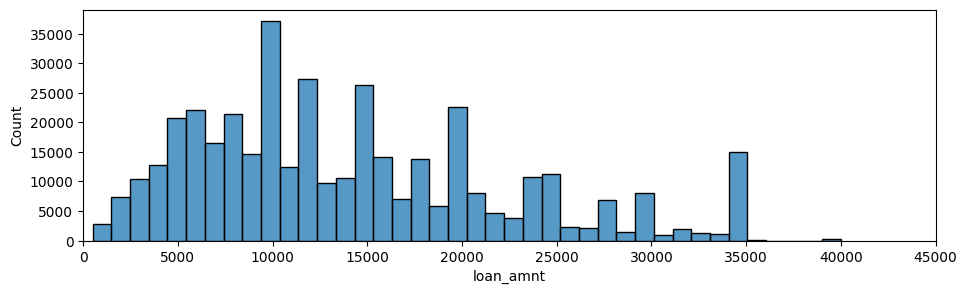

In [9]:
plt.figure(figsize=(11,3))
sns.histplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

|-- >`Special Note` :  `distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751 <--|

- Something to notice here
is we see these spikes happening
at these `even money amounts`.
Which kind of makes sense.
So, clearly these bin spikes are happening
at something like an even $10,000 loan.
Instead of a spike
at some random value like 8,333.
So, that's what these little spikes
are essentially indicating,
that `there are certain amounts
that are basically standard loans`.

**`TASK_3`: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [10]:
df.corr(numeric_only=True)['loan_amnt'].sort_values(ascending=False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

**`TASK_4`: Visualize this using a bar and then heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

<Axes: >

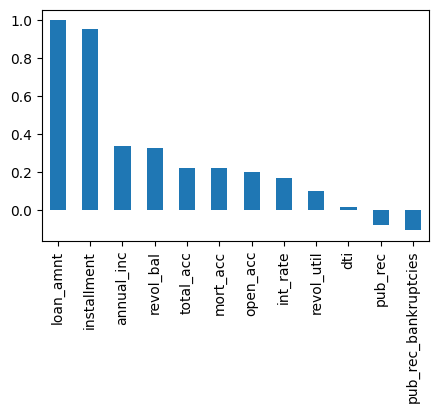

In [11]:
plt.figure(figsize=(5,3))
df.corr(numeric_only=True)['loan_amnt'].sort_values(ascending=False).plot(kind='bar')

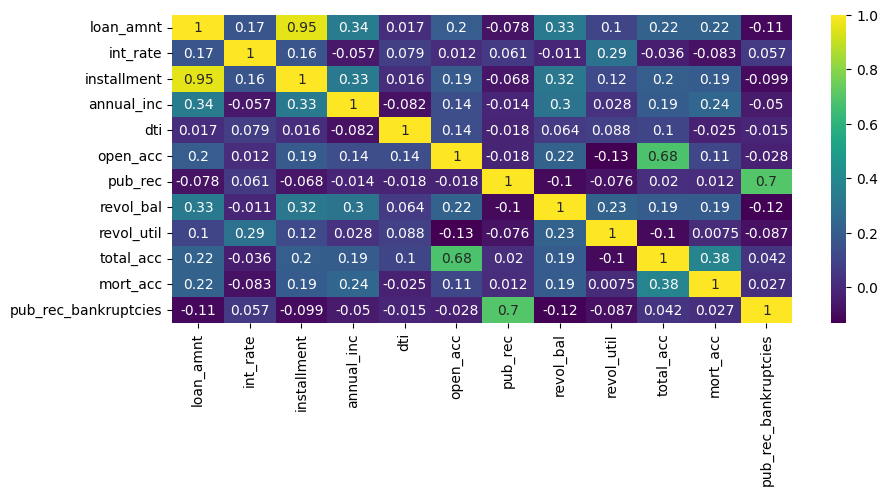

In [12]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()

**`TASK_5`: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

`installment` is the monthly payment
owed by the borrower if the loan originates.

`Loan amount` is the amount of the loan applied for by the borrower.

- We wanna make sure that we're not accidentally
`leaking data from our features into our label`.
So, we always wanna make sure
that there's `not` a single feature
that is a perfect predictor of the label.
Because that basically indicates
that it's `not really a feature`,
it's probably just some `duplicate information`
that's very `similar to the label`


In [13]:
df[['loan_amnt','installment']].describe()

,loan_amnt,installment
count,396030.000000,396030.000000
mean,14113.888089,431.849698
std,8357.441341,250.727790
min,500.000000,16.080000
25%,8000.000000,250.330000
50%,12000.000000,375.430000
75%,20000.000000,567.300000
max,40000.000000,1533.810000


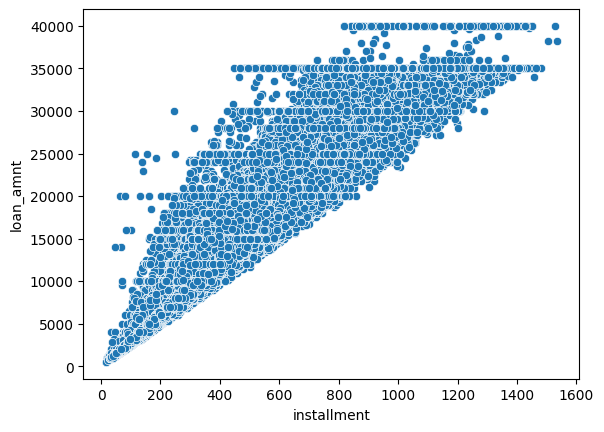

In [14]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
plt.show()

**`TASK_6`: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

- This is going to answer the question,
is there a `relationship` between
maybe really `expensive loans`
and `not being able to pay them off`,
or `very low amount loans`
and then `fully paying those off`

Boxplots are particularly useful for `comparing` distributions between different groups.

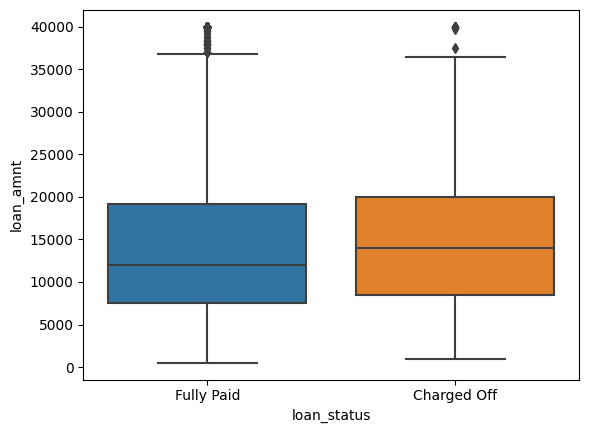

In [15]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.show()

- In general, it looks like
they're pretty `similar`.
Charged off loans on average,
you can see this boxplot is `slightly higher`.
Meaning that if our loan amount is higher,
we have a slight increase in the likelihood
of it being charged off.
Which again intuitively makes sense,
that it's `harder` to pay back `larger loans`
than it is `smaller loans`.

**`TASK_7`: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

`Grouping data` is a common operation in data analysis that allows us to calculate summary statistics or perform other computations on subsets of the data. By grouping the data, we can analyze the relationships and characteristics of specific categories within the data.

When we calculate summary statistics for the loan amount, grouped by loan_status, we're essentially asking for a breakdown of the statistics (such as mean, median, standard deviation, etc.) for loan amounts for each unique loan_status category.

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


- So, if you ever get a case like this,
that the boxplot is a little hard to read,
you can always compare the averages here.

So, you can see the `charged off average price`
is a little `higher` than the `fully paid loan`.
Okay, so again, all this is indicating is,
the `averages` of the loans
for `people that aren't able to pay them back`
are slightly `higher` than the `averages
for people that do pay off their loans`.

**`TASK_8`: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

`Subgrade` is the LendingClub assigned loan subgrade.

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

- And we can see right away that the `subgrades`
basically contain the information
of the actual `grade` itself.
Because it contains the letter grade,
and then some sort of sub character

**`TASK_9`: Create a countplot per grade. Set the hue to the loan_status label.**

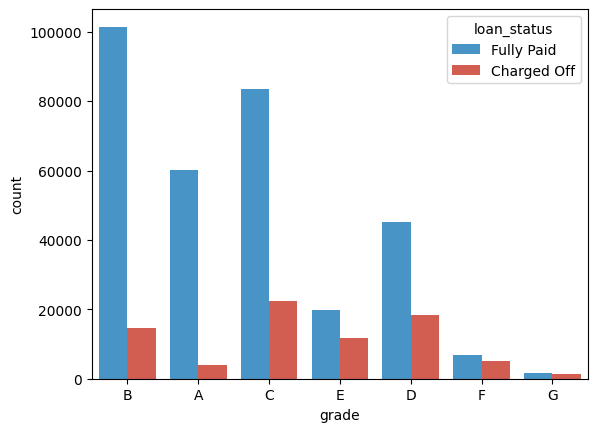

In [19]:
sns.countplot(x='grade',data=df,hue='loan_status',palette=['#3498db', '#e74c3c'])
plt.show()

- Here we can see
the kind of a clear relationship.
But what's a little hard to tell here,
is the ordering of the actual grades.
So, notice that we're starting
with B and then going A, C, E, D, F, G.
So what would be nice,
and what we're gonna do
in the next problem or next task,
is actually figure out
how to reorder these X axes ticks.
But essentially what this is showing
is the `percentage of charged off loans`,
looks like it's `increasing`
as the `letter grade` gets `higher`.
So, it looks like the `best customers`
are given a `grade of A`.
The `second best` given a `grade
of B, C, D, et` cetera.

**`TASK_10`: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [20]:
# How to order the letters:
subgrade_order = sorted(df['sub_grade'].unique())

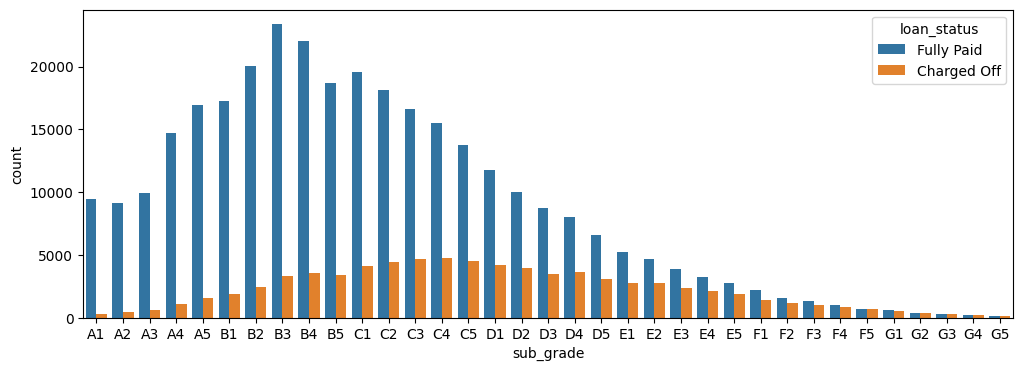

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order= subgrade_order,hue ='loan_status',)
plt.show()

**`TASK_11`: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

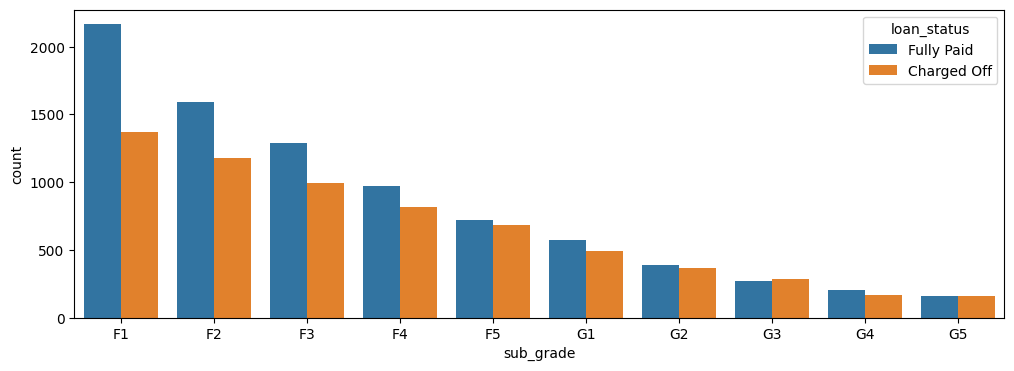

In [22]:
f_and_g =df[(df['grade']=='G') | (df['grade']=='F')]
subgrade_order = sorted(f_and_g['sub_grade'].unique())

plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=f_and_g,order= subgrade_order,hue ='loan_status',)
plt.show()

**`TASK_12`: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**`CHALLENGE TASK`: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

<Axes: >

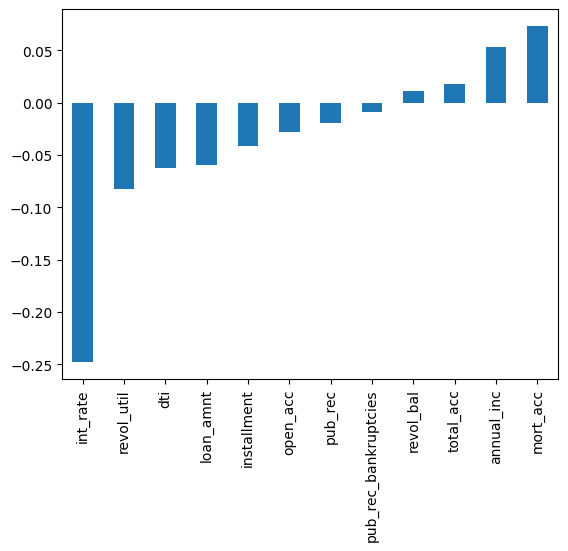

In [24]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

- First step, actually calculate
those correlations.
Next step is to only grab
that loan repaid column.
After that, what we can do
is say plot kind equals bar.
And that gives us the very basics
of what this plot is doing.
However, one thing to notice
is loan repaid is going to be included
and it's not sorted.
So what we can do here,
is before we call plot,
we'll go ahead and say,
sort those values, sort_ values.
You plot that out.
And now we get the sorted version here.
However, it makes sense that loan repaid
is perfectly correlated for loan repaid.
So, we will go ahead and drop loan repaid.
And I don't need to specify axes,
because this is actually now a series
from the correlation data frame.
Run that, and now we'll get back
the exact same plot here.
So, we can see that interest rate
has essentially the highest negative correlation
with whether or not someone's going
to repay their loan.
Which kinda makes sense.
Maybe if we have
an extremely high interest rate,
we're gonna find it harder to pay off that loan

## **Section_2: Data PrePorocessing**

**Section Goals: `Remove` or `fill any missing data`. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


**Missind Data**

**Let's `explore this missing data columns`. We use a variety of factors to decide whether or not they would be useful, to see if we `should keep`, `discard`, or `fill in the missing data`.**

**TASK: What is the length of the dataframe?**

In [26]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [28]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

So it looks like the ones we're gonna have to really focus
on is this `mortgage accounts`,
because we can't just really drop `10%` of our data,
but some of these are so minor, like `revol_until` & `pub_rec_bankruptices`,
actually less than half a percent of our data,
so it should be fine to drop some of these.

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

`emp_title`: the job title supplied
by the borrower when applying for the loan.

`emp_length`: it's the employment length in years.

So possible values are between zero and 10, where zero means
less than one year and 10 means 10 or more years.

**TASK: How many unique employment job titles are there?**

Because we wanna start thinking,
are we just going to drop employment title,
or fill it in with something?

In [29]:
df['emp_title'].nunique()

173105

there's a ton of unique employment titles.
In fact, there's 173,000 unique employment titles.
Recall that our dataset itself was around 400,000.
So it looks like there's almost half

In [30]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

we can see here
that we have some teachers, managers, registered nurses,
et cetera, and we have a ton of titles
that are actually just unique to that particular person.
So realistically, there are just way too many titles
to convert this to some sort of `dummy variable feature`.
We `can't add in an extra 173,000 columns of Booleans`.
Now, what you could do is maybe
with `extensive feature engineering`, start categorizing these
maybe as `high income jobs` versus `medium income jobs`,
but again, you'll have to make a lot of assumptions,
and you'll have to figure out how to do this
and map it to over 173,000 different job titles,
so this is just so many unique job titles
that it's probably not gonna be very informative,
because half of all people have some unique job title.
So instead, what we're going to do is we'll `simply remove
that title` because it's not realistically going to be useful
to us in any manner.

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [31]:
df = df.drop('emp_title',axis=1)

And we must be careful with these dropping statements,
because we can only run them once.
If we try running them more than once,
we'll end up getting an error
because we already removed that feature.

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [32]:
df['emp_length'].dropna()

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 377729, dtype: object

In [33]:
df['emp_length'].dropna().value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [34]:
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 ]

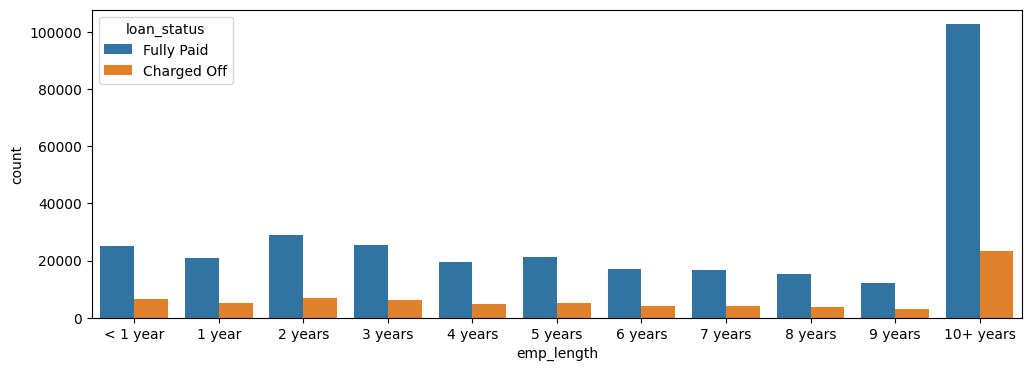

In [37]:
# plot countplot with dufferent color:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')
plt.show()

So it looks like quite the majority of people have been working in their employment
for 10 plus years, which makes sense.
If you're taking a loan, you're very likely to have a job,
otherwise, how are you gonna pay it back?

and really what I'm interested in here is
the relationship between fully paid off
versus charged off per employment length.
If there's an extreme difference in one of these categories
of fully paid off versus charged off, for example,
maybe if you worked less than one year,
everyone there charged off their loan, didn't pay it back,
then it's a very important feature.
If the ratio of this blue bar
to this orange bar is essentially the same
across all these employment length categories,
then this isn't a very informative feature.

So what I wanna do is I really wanna figure out the ratio
between the fully paid off versus charged off people
per category of employment length.

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between `employment length` and `being charged off`, what we want is `the percentage of charge offs per category`. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [38]:
# the people that did not pay back their loans:
df[df['loan_status']=='Charged Off']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,...",0
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,...,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\r\nDPO AE 48052,0
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,...,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723",0
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396000,10000.0,36 months,12.85,336.22,B,B4,10+ years,MORTGAGE,95000.0,Source Verified,...,1.0,5718.0,57.8,37.0,w,INDIVIDUAL,6.0,1.0,"66798 Jessica Avenue Apt. 921\r\nPort Angela, ...",0
396001,15000.0,60 months,15.61,361.67,D,D1,10+ years,MORTGAGE,47000.0,Source Verified,...,0.0,4621.0,55.0,15.0,w,INDIVIDUAL,1.0,0.0,"1398 Allen Mission\r\nAdrianstad, ME 22690",0
396002,17500.0,36 months,13.66,595.23,C,C3,< 1 year,RENT,70000.0,Source Verified,...,0.0,16637.0,88.0,42.0,f,INDIVIDUAL,0.0,0.0,"127 Gregory Vista\r\nFowlerville, AZ 70466",0
396011,13000.0,36 months,10.99,425.55,B,B4,10+ years,RENT,56000.0,Not Verified,...,0.0,9964.0,64.3,23.0,w,INDIVIDUAL,3.0,0.0,"7359 Stone Land\r\nWest Josefurt, SC 30723",0


In [39]:
# people that did fully pay off their loan:
df[df['loan_status']=='Fully Paid']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
5,20000.0,36 months,13.33,677.07,C,C3,10+ years,MORTGAGE,86788.0,Verified,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [40]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [41]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [42]:
emp_co/emp_fp    # this is the ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [43]:
# To have the percentage:
emp_len=emp_co/(emp_co+emp_fp)
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

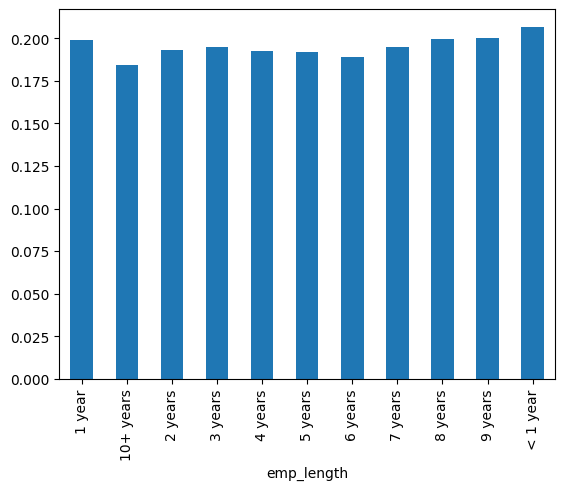

In [44]:
emp_len.plot(kind='bar')

since all these bars are almost the same height,
there really isn't that much information
or differentiation between the employment length columns,
which is kind of surprising, but we can see here,
the main difference is that people who worked
for 10 years have a slightly smaller charge off rate
than people who worked less,
like one year or less than a year.
But the difference is not extreme enough
to really validate keeping this feature,
so since they're so extremely similar
across all employments, what we'll go ahead
and do is just drop that column.

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [45]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [46]:
df = df.drop('emp_length',axis=1)

In [47]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [48]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

it looks like we still have the title,
this revol_util, this mortgage accounts,
and the public record bankruptcies.